# 取引履歴のデータ分析

In [1]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
matplotlib.use("TkAgg")

In [3]:
current_dir = %pwd
timestamp = os.path.basename(current_dir)

In [4]:
import sys
sys.path.append('/home/tsu-nera/repo/bakuchi/')
%cd '../../'

/home/tsu-nera/repo/bakuchi


In [5]:
from src.utils.trade_analysis import TradeAnalysis

%reload_ext autoreload
%autoreload 2

File doesn't exist 


In [6]:
ta = TradeAnalysis(timestamp)

In [7]:
ex1_trades = ta.get_coincheck_trades_df()
ex2_trades = ta.get_liquid_trades_df()

In [8]:
len(ex1_trades), len(ex2_trades)

(16, 16)

## トレード結果

In [9]:
ta.display()

トレード情報
-------------------  -------------------
         レコード数                12894
           取引回数                   16
           開始日時  2020-05-07 00:16:20
           終了日時  2020-05-07 01:20:42
        取引時間[H]      0 days 01:04:22
      取引単位[BTC]                0.006
  利確しきい値[JPY]                 2000
損切りマージン[JPY]                 1000
-------------------  -------------------


トレード結果
-----------  --------
開始[JPY]       13823
終了[JPY]       13795
利益[JPY]         -28
開始[BTC]    0.024282
終了[BTC]    0.024297
利益[BTC]     1.5e-05
開始[TOTAL]     37628
終了[TOTAL]     37661
利益[TOTAL]        33
-----------  --------


トレード利益
  Bot利益    トレード利益    市場利益
---------  --------------  ----------
       33         -14.404      47.404


## 取引履歴

In [10]:
profit_df = ta.create_profit_df()

In [11]:
profit_df.tail(30)

,ex1_side,ex1_price,ex2_side,ex2_price,profit
timestamp,,,,,
2020-05-07 00:16:20,buy,5911.992,sell,5911.950,-0.042
2020-05-07 00:18:28,sell,5901.090,buy,5906.417,-5.327
2020-05-07 00:28:52,buy,5904.995,sell,5908.284,3.289
2020-05-07 00:43:25,sell,5898.000,buy,5897.412,0.588
2020-05-07 01:02:12,buy,5894.999,sell,5894.778,-0.221
2020-05-07 01:04:12,sell,5914.074,buy,5914.818,-0.744
2020-05-07 01:08:54,buy,5925.990,sell,5926.158,0.168
2020-05-07 01:09:18,sell,5930.994,buy,5933.826,-2.832
2020-05-07 01:09:39,buy,5930.995,sell,5928.912,-2.083


In [12]:
round(sum(profit_df.profit), 3)

-27.272

## トレードグラフ

In [13]:
ex1_ticks = ta.get_coincheck_ticks_df()
ex2_ticks = ta.get_liquid_ticks_df()

In [14]:
len(ex1_ticks), len(ex2_ticks)

(12894, 12894)

In [15]:
ex1_bids = ex1_ticks['bid']
ex1_asks = ex1_ticks['ask']
ex2_bids = ex2_ticks['bid']
ex2_asks = ex2_ticks['ask']

fig1, ax1 = ta.get_fig(ex1_bids, ex2_asks)
fig2, ax2 = ta.get_fig(ex2_bids, ex1_asks)

ax1.set_title('exchange1 bid/exchange2 ask')
ax2.set_title('exchange2 bid/exchange1 ask')

Text(0.5, 1, 'exchange2 bid/exchange1 ask')

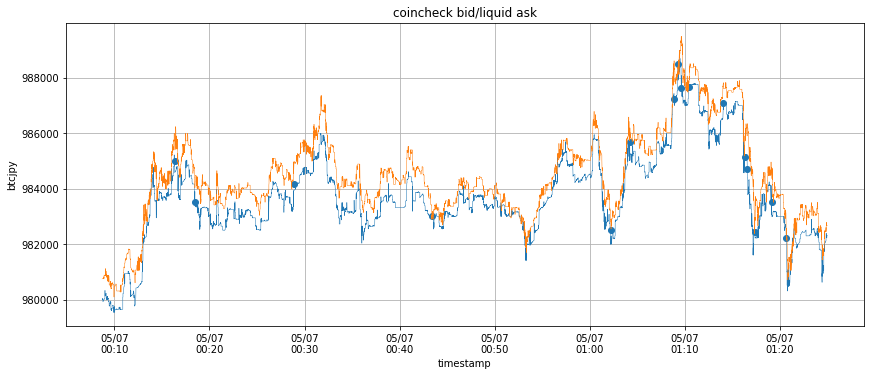

In [16]:
fig1

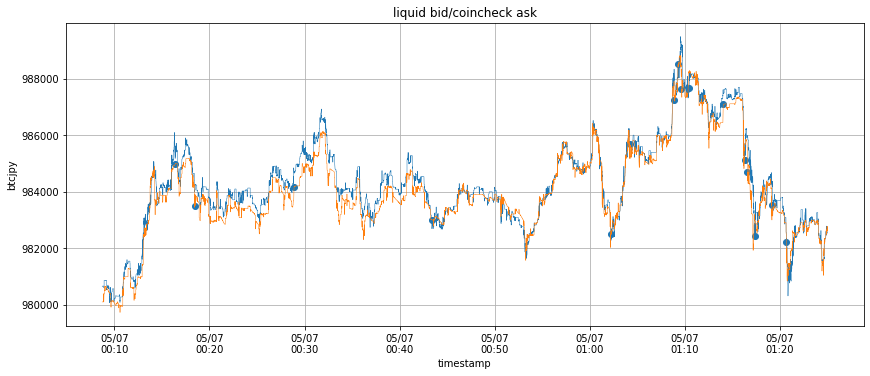

In [17]:
fig2